In [ ]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.simplefilter('ignore')


In [ ]:
#Reading the first five rows of the dataset
df = pd.read_csv("/content/drive/MyDrive/turnover.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


EDA

In [ ]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#To know some statistical measure
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# checking the no of rows and columns in the dataset
df.shape

(14999, 10)

In [ ]:
# checking the value counts 
df['left'].value_counts()


0    11428
1     3571
Name: left, dtype: int64

In [ ]:
# Checking the null values in the dataset 
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

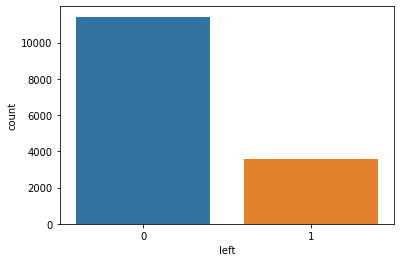

In [ ]:
#count plot
sns.countplot(df['left'])
plt.show()

In [ ]:
# checking the columns correlation 
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Data Visualization

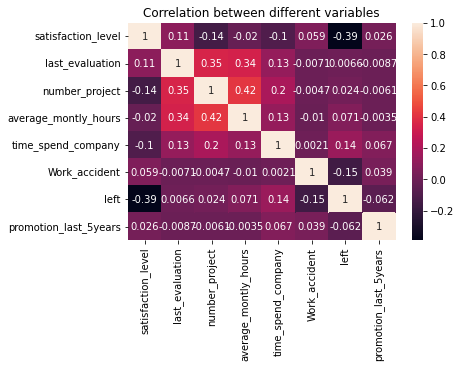

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between different variables')
plt.show()

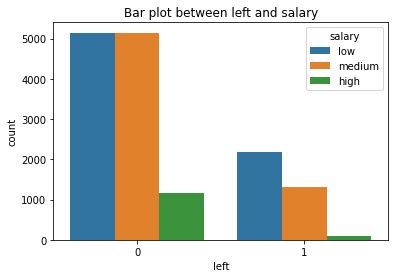

In [ ]:
sns.countplot('left', hue= 'salary', data=df)
plt.title('Bar plot between left and salary')
plt.show()


In [ ]:
df['salary'].value_counts()/len(df)*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

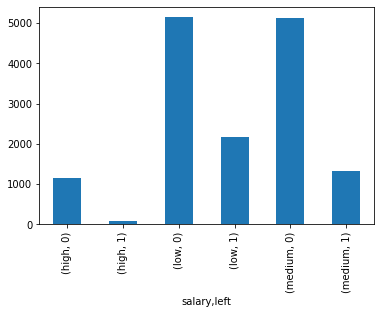

In [ ]:
df.groupby('salary')['left'].value_counts().plot(kind='bar')

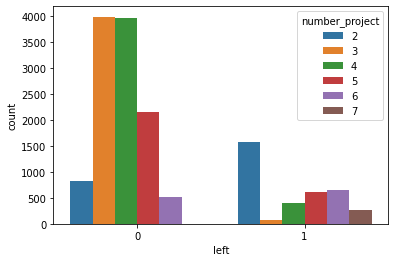

In [ ]:
sns.countplot(df['left'], hue= df['number_project'])
plt.show()

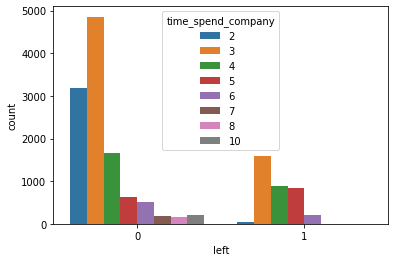

In [ ]:
sns.countplot(df['left'], hue= df['time_spend_company'])
plt.show()

In [ ]:
#counting of unique values in salary column
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
#counting of unique values in sales column
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [ ]:
#converting categorical columns into numerical
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])


In [ ]:
#checking the skewness 
df.skew()

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
sales                   -0.833084
salary                  -0.418758
dtype: float64

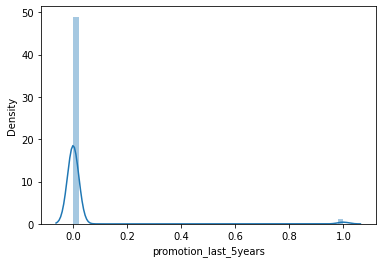

In [ ]:
sns.distplot(df['promotion_last_5years'])

In [ ]:
data_log= np.log(df['promotion_last_5years'])


In [ ]:
def outlier(values):
  Q1 = values.quantile(0.25)
  Q3 = values.quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  lower_limit,upper_limit
  print("IQR,lower_limit,upper_limit")
  return IQR,lower_limit,upper_limit

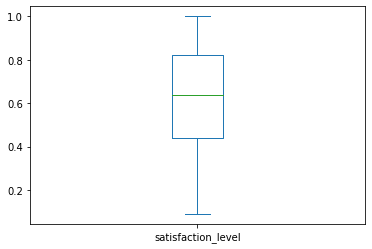

In [ ]:
 # no outlier
df['satisfaction_level'].plot.box() 

In [ ]:
outlier(df['satisfaction_level'])

IQR,lower_limit,upper_limit


(0.37999999999999995, -0.12999999999999995, 1.39)

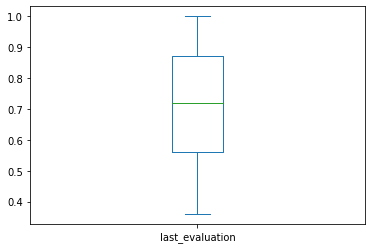

In [ ]:
df['last_evaluation'].plot.box()   #---- no outlier present

In [ ]:
outlier(df['last_evaluation'])

IQR,lower_limit,upper_limit


(0.30999999999999994, 0.09500000000000014, 1.335)

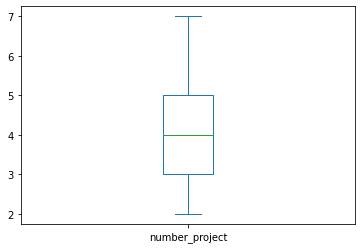

In [ ]:
df['number_project'].plot.box()

In [ ]:
outlier(df['number_project'])

IQR,lower_limit,upper_limit


(2.0, 0.0, 8.0)

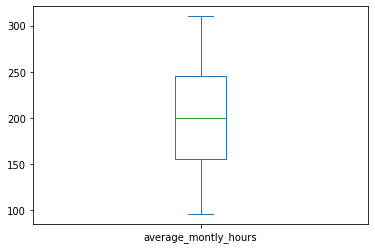

In [ ]:
df['average_montly_hours'].plot.box()

In [ ]:
outlier(df['average_montly_hours'])

IQR,lower_limit,upper_limit


(89.0, 22.5, 378.5)

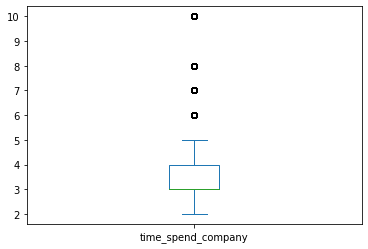

In [ ]:
df['time_spend_company'].plot.box()

In [ ]:
# outlier present in time_spend_company
outlier(df['time_spend_company'])  

IQR,lower_limit,upper_limit


(1.0, 1.5, 5.5)

In [ ]:
Q1 = df['time_spend_company'].quantile(0.25)
Q3 = df['time_spend_company'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['time_spend_company']<lower_limit)|(df['time_spend_company']>upper_limit)]

In [ ]:
df =  df[(df['time_spend_company']>lower_limit)&(df['time_spend_company']<upper_limit)]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1


In [ ]:
x= df.drop('left', axis=1)
print(x)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
2                       272                   4              0   
3                       223                   5          

In [ ]:
y=df['left']
print(y)

0        1
2        1
3        1
4        1
5        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 13717, dtype: int64


In [ ]:
# Oversampling
ros = RandomOverSampler(random_state=42)
ros.fit(x,y)

RandomOverSampler(random_state=42)

In [ ]:
x_resampled, y_resampled  = ros.fit_resample(x,y)

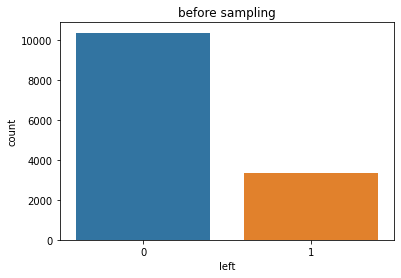

In [ ]:
# plot before sampling
sns.countplot(df['left'])
plt.title("before sampling")
plt.show()

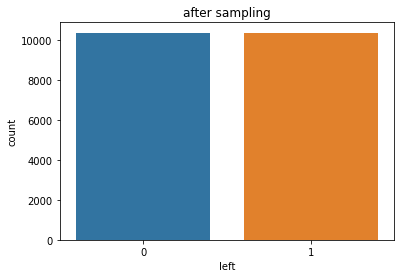

In [ ]:
# plot after sampling
sns.countplot(y_resampled)
plt.title("after sampling")
plt.show()

In [ ]:
#splitting data into train test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
print(x.shape, x_train.shape, x_test.shape) 

(13717, 9) (10973, 9) (2744, 9)


In [ ]:
#model training
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#accuracy on training data
x_train_prediction = LR.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [ ]:
print('Accuracy on training data:',training_data_accuracy)


Accuracy on training data: 0.8128132689328351


In [ ]:
#Accuracy on test data
x_test_prediction = LR.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.8112244897959183


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[1872  340]
 [ 178  354]]


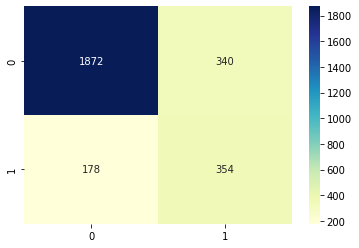

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2212
           1       0.51      0.67      0.58       532

    accuracy                           0.81      2744
   macro avg       0.71      0.76      0.73      2744
weighted avg       0.84      0.81      0.82      2744



In [ ]:
#calculating the predicted probability for Logistic Regression
y_hat = LR.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
LR_roc_auc = roc_auc_score(y_test, LR.predict(x_test))
LR_roc_auc


0.7116285935193646

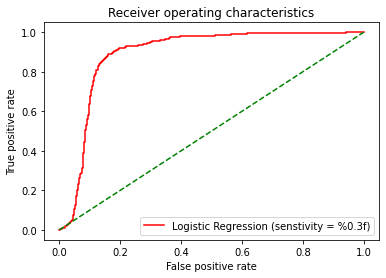

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (senstivity = %0.3f)',color='r' %LR_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [ ]:
# cross validation score
scores = cross_val_score(LR, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.80617824 0.82367414 0.81542248]
0.82 accuracy with a standard deviation of 0.01


Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [ ]:
#accuracy on training data
x_train_prediction = NB.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = NB.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.8642121571129135
Accuracy on test data: 0.8637026239067055


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[1749   73]
 [ 301  621]]


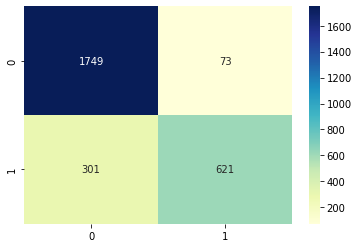

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#calculating the predicted probability for Naive Bayes
y_hat = NB.predict_proba(x_test)[:,1]

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
NB_roc_auc = roc_auc_score(y_test, NB.predict(x_test))
NB_roc_auc

0.8739917059112955

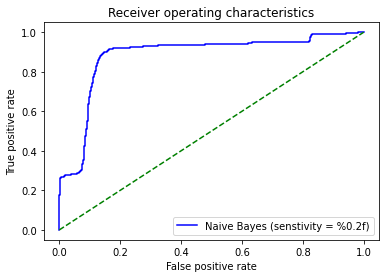

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (senstivity = %0.2f)',color='b' %NB_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [ ]:
# cross validation score
scores = cross_val_score(NB, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.85155823 0.87534172 0.85671315]
0.86 accuracy with a standard deviation of 0.01


Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#accuracy on training data
x_train_prediction = DT.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = DT.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 1.0
Accuracy on test data: 0.9774052478134111


In [ ]:

#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[2012   24]
 [  38  670]]


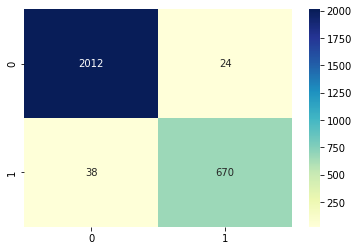

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#calculating the predicted probability for Decision Tree
y_hat = DT.predict_proba(x_test)[:,1]

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
DT_roc_auc = roc_auc_score(y_test, DT.predict(x_test))
DT_roc_auc

0.9734406410346523

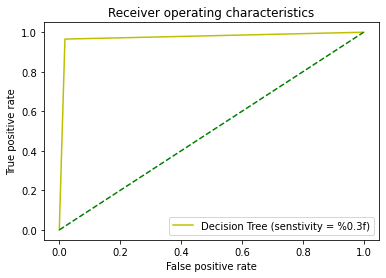

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (senstivity = %0.3f)',color='y' %DT_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [ ]:
# cross validation score
scores = cross_val_score(DT, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.97621651 0.97566976 0.97374897]
0.98 accuracy with a standard deviation of 0.00


Random Forest

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#accuracy on training data
x_train_prediction = RF.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = RF.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 1.0
Accuracy on test data: 0.9908892128279884


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[2049   24]
 [   1  670]]


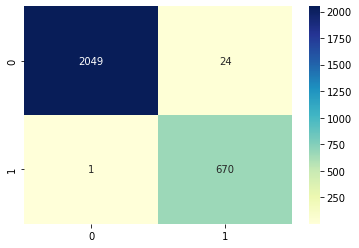

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#calculating the predicted probability for Random Forest
y_hat = RF.predict_proba(x_test)[:,1]

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
RF_roc_auc = roc_auc_score(y_test, RF.predict(x_test))
RF_roc_auc

0.9824650312785548

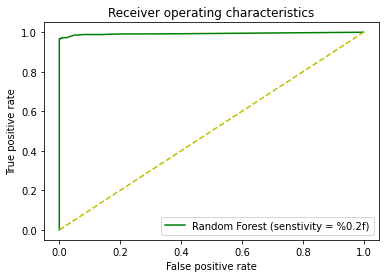

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (senstivity = %0.2f)',color='g' %RF_roc_auc)
plt.plot([0,1],[0,1], 'y--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [ ]:
# cross validation score
scores = cross_val_score(RF, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.98824494 0.99152542 0.98714794]
0.99 accuracy with a standard deviation of 0.00


XGB

In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier()

In [ ]:
#accuracy on training data
x_train_prediction = xgb.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = xgb.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9776724687870227
Accuracy on test data: 0.9795918367346939


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[2041   47]
 [   9  647]]


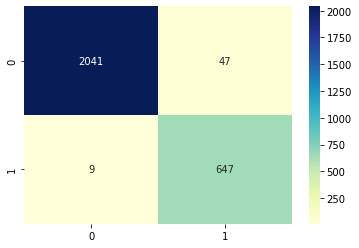

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#calculating the predicted probability for XG boost
y_hat = xgb.predict_proba(x_test)[:,1]

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
xgb_roc_auc = roc_auc_score(y_test, xgb.predict(x_test))
xgb_roc_auc

0.9639432065790399

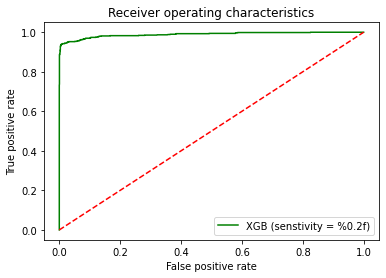

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='XGB (senstivity = %0.2f)',color='g' %xgb_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [ ]:
# cross validation score
scores = cross_val_score(xgb, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.97512302 0.97922362 0.97538966]
0.98 accuracy with a standard deviation of 0.00


KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#accuracy on training data
x_train_prediction = knn.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = knn.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9569853276223458
Accuracy on test data: 0.9453352769679301


In [ ]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[1959   59]
 [  91  635]]


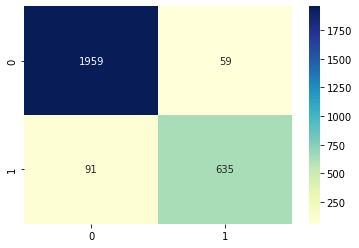

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#calculating the predicted probability for k-nearest neighbors
y_hat = knn.predict_proba(x_test)[:,1]

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
knn_roc_auc

0.9352976734378294

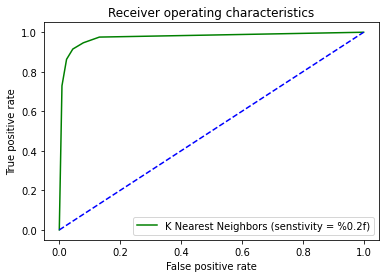

In [ ]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='K Nearest Neighbors (senstivity = %0.2f)',color='g' %knn_roc_auc)
plt.plot([0,1],[0,1], 'b--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [ ]:
# cross validation score
scores = cross_val_score(knn, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


cross-validation_scores:  [0.93220339 0.93903773 0.93956795]
0.94 accuracy with a standard deviation of 0.00


Hyper Parameter Tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

RF_tuned = RandomForestClassifier(random_state=42)

RF_cv = RandomizedSearchCV(
    estimator=RF_tuned, param_distributions=param_dist, cv=5, random_state=42)

RF_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [ ]:
RF_cv.best_score_

0.9906134560397687

In [ ]:
RF_cv.best_params_

{'n_estimators': 142, 'max_depth': 110}

In [ ]:
RF_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [ ]:
RF_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [ ]:
#accuracy on training data
x_train_prediction = RF_best.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = RF_best.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9998177344390777
Accuracy on test data: 0.9908892128279884


In [ ]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2071
           1       0.97      1.00      0.98       673

    accuracy                           0.99      2744
   macro avg       0.98      0.99      0.99      2744
weighted avg       0.99      0.99      0.99      2744

